<a href="https://colab.research.google.com/github/qpwisu/computer_vision/blob/master/hough_transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hough Transform을 이용한 직선 구하는 알고리즘
- 주어진 영상으로부터 edge를 검출하기 위한 알고리즘을 통하여 이진화하기
- 이진화된 영상으로부터 hough transform을 통하여 각 직선을 구하기

#1단계
- 컬러 입력 영상 읽은 후 gray 영상으로 변환 (OpenCV lib를 이용하여 변환하기)
- 주의할점: opencv를 이용하여 영상을 읽으면 BGR순서로 저장됨
- 생각해볼점: plt lib를 이용하여 영상을 읽고 gray 영상으로보 변환하기

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2

image = cv2.imread('highway.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
height, width = gray.shape
print(height, width)

plt.imshow(gray, cmap='gray')
plt.show()

error: ignored

#2단계
- 입력 영상으로부터 sobel edge를 구하기
- x축 방향으로의 edge 성분과 y축 방향으로 edge 성분 구하기 (커널 사이즈는 3, 바꾸어서도 해보기 바람)
- convertScaleAbs--> 검출된 sobel edge 값을 이용하여 unsigned char로 저장하기 위한 과정
- 생각해볼점: 앞에서 배운 filter를 이용하여 각 방향에 대한  sobel edge 구하는 알고리즘을 작성해볼 것

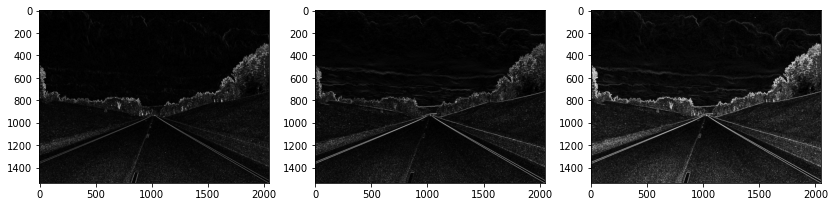

In [ ]:
img_sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)

img_sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
img_sobel_y = cv2.convertScaleAbs(img_sobel_y)


img_sobel = cv2.addWeighted(img_sobel_x, 1, img_sobel_y, 1, 0);

plt.figure(figsize=(14,7))
plt.subplot(131)
plt.imshow(img_sobel_x, cmap='gray')

plt.subplot(132)
plt.imshow(img_sobel_y, cmap='gray')

plt.subplot(133)
plt.imshow(img_sobel, cmap='gray')

plt.show()

#3단계 Threshold(임계값)을 활용하여 binary image로 만들기
- threshold는 임계값, binary_img는 threshold를 이용하여 binary로 표현된 값

230.0


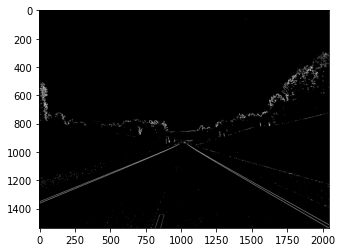

In [ ]:
threshold, binary_img = cv2.threshold(img_sobel, 230, 255, cv2.THRESH_BINARY)

print(threshold)
plt.imshow(binary_img, cmap='gray')
plt.show()

#4단계 Hough 변환하기 위한 함수만들기
- XY좌표계를 극좌표계로 변환하기 (초기화)

In [ ]:

theta_max = 1.0 * np.pi
theta_min = 0.0
r_min = 0.0
r_max = np.sqrt(height*height +width*width)

r_dim = 200 
theta_dim = 300

hough_space = np.zeros((r_dim,theta_dim))

for i in range(height):
    for j in range(width):
        if binary_img[i,j] == 0: continue
        for itheta in range(theta_dim):
            theta = 1.0 * itheta * theta_max / theta_dim
            r = i * np.cos(theta) + j * np.sin(theta)
            ir = int(r_dim * ( 1.0 * r ) / r_max)
            hough_space[ir,itheta] = hough_space[ir,itheta] + 1

Text(0.5, 1.0, 'Hough Space')

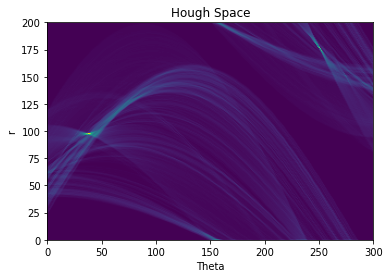

In [ ]:

plt.imshow(hough_space, origin='lower')
plt.xlim(0,theta_dim)
plt.ylim(0,r_dim)


plt.xlabel(r'Theta')
plt.ylabel(r'r')
plt.title('Hough Space')



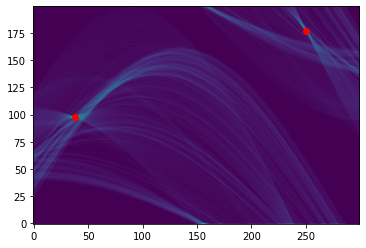

In [ ]:
import scipy.ndimage.filters as filters
import scipy.ndimage as ndimage
neighborhood_size = 40
threshold = 3000

data_max = filters.maximum_filter(hough_space, neighborhood_size)
maxima = (hough_space == data_max)

data_min = filters.minimum_filter(hough_space, neighborhood_size)
diff = ((data_max - data_min) > threshold)
maxima[diff == 0] = 0

labeled, num_objects = ndimage.label(maxima)
slices = ndimage.find_objects(labeled)

x, y = [], []
for dy,dx in slices:
    x_center = (dx.start + dx.stop - 1)/2
    x.append(x_center)
    y_center = (dy.start + dy.stop - 1)/2    
    y.append(y_center)



plt.imshow(hough_space, origin='lower')

plt.autoscale(False)
plt.plot(x,y, 'ro')

